In [37]:
from pathlib import Path 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [38]:
folder = Path('./params/N4')
for f in folder.iterdir():
    print(f.name.split('C')[-1].rstrip('.dat'))

0.3
0.05
0.0
0.1
1.0
0.01
0.08
0.5
0.7


In [39]:
C_list = []
percent_seg = []
percent_alt = []
eff = []
ineq = []
eff_er = []
ineq_er = []
for f in folder.iterdir():
    C = f.name.split('C')[-1].rstrip('.dat')
    df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
    C_list.append(C)
    
    mx = df['inequality'].max()
    mn = 0.95*mx
    df_seg = df[(df['inequality']>mn) & (df['emax_perc']>0.95)]
    percent_seg.append(df_seg.shape[0]/df.shape[0])

    mn = 0.05*mx
    df_alt = df[(df['inequality']<mn) & (df['emax_perc']>0.95)]
    percent_alt.append(df_alt.shape[0]/df.shape[0])

    eff.append(df['efficiency'].mean())
    ineq.append(df['inequality'].mean())
    eff_er.append(df['efficiency'].std())
    ineq_er.append(df['inequality'].std())

df_c = pd.DataFrame({'c':C_list, '%seg':percent_seg, '%alt':percent_alt, 'eff':eff, 'ineq':ineq, 'eff_er':eff_er, 'ineq_er':ineq_er})
df_c.c.astype('float')
df_c.sort_values(by='c',inplace=True)
df_c.head()

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6600/3303117902.py:10: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])


,c,%seg,%alt,eff,ineq,eff_er,ineq_er
2,0.0,0.0,0.0,0.057935,0.051890,0.043345,0.043254
5,0.01,0.0,0.0,0.102419,0.045550,0.012256,0.031228
1,0.05,0.0,0.0,0.109126,0.042035,0.007928,0.028492
6,0.08,0.0,0.0,0.111085,0.038877,0.006815,0.027786
3,0.1,0.0,0.0,0.111807,0.039378,0.006281,0.028241


In [40]:
df_c['c'].iloc[df_c['eff'].argmax()]

'0.1'

<Axes: xlabel='c', ylabel='%seg'>

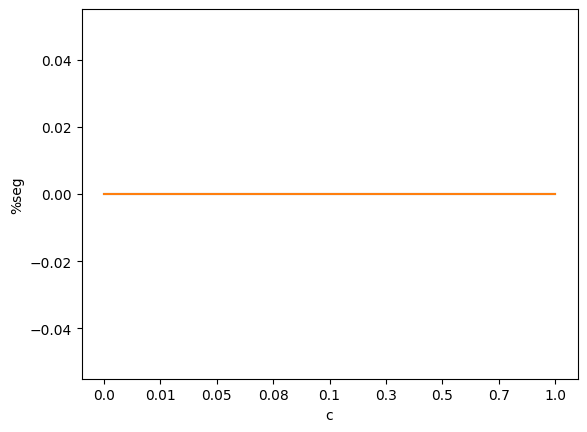

In [41]:
sns.lineplot(x='c',y='%seg',data=df_c)
sns.lineplot(x='c',y='%alt',data=df_c)

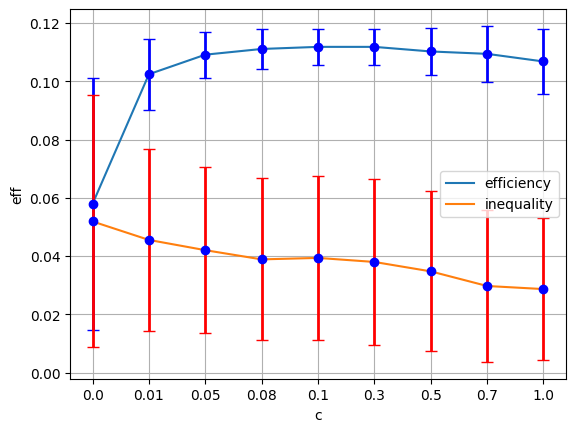

In [42]:
sns.lineplot(x='c',y='eff',data=df_c, label='efficiency')
plt.errorbar(x=df_c['c'], y=df_c['eff'], yerr=df_c["eff_er"], fmt='o', color='blue', ecolor='b', elinewidth=2, capsize=4)
sns.lineplot(x='c',y='ineq',data=df_c, label='inequality')
plt.errorbar(x=df_c['c'], y=df_c['ineq'], yerr=df_c["ineq_er"], fmt='o', color='blue', ecolor='r', elinewidth=2, capsize=4)
plt.grid()